In [ ]:
# Exploration of Principle Component Analysis

In [1]:
import numpy as np
np.random.seed(1) # random seed for consistency

In [ ]:
# create class 1 random sampled 3 X 20 data set

In [2]:
mu_vec1 = np.array([0,0,0])  # sample mean
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]]) # sample covariance
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T
assert class1_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

In [5]:
# create class 2 random sampled 3 x 20 data set

In [3]:
mu_vec2 = np.array([1,1,1]) # sample mean
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]]) #sample covariance
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T
assert class1_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

In [ ]:
# plot samples

Populating the interactive namespace from numpy and matplotlib


//anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


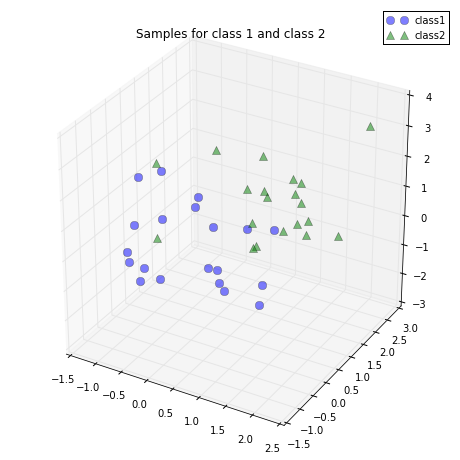

In [7]:
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:],
        'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:],
        '^', markersize=8, alpha=0.5, color='green', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

In [ ]:
# step 1. take the whole data set ignoring classes

In [8]:
all_samples = np.concatenate((class1_sample, class2_sample), axis=1)
assert all_samples.shape == (3,40), "The matrix has not the dimensions 3x40"

In [9]:
all_samples

array([[ 1.62434536, -1.07296862,  1.74481176, -0.24937038, -0.3224172 ,
        -1.09989127,  0.04221375,  1.14472371,  0.90085595, -0.93576943,
        -0.69166075, -0.84520564, -1.11731035,  0.74204416, -0.74715829,
        -0.63699565,  0.12015895, -0.35224985, -0.20889423,  0.93110208,
         0.24560206,  0.70190716,  2.13162939, -0.39649634,  1.16003707,
        -1.02220122,  1.23009474,  0.79924193,  1.19829972,  1.37756379,
         2.19891788,  0.36126959,  0.65614632,  1.69803203,  1.40349164,
         1.16938243,  0.73378149,  1.31515939,  1.35054598, -0.61577235],
       [-0.61175641,  0.86540763, -0.7612069 ,  1.46210794, -0.38405435,
        -0.17242821,  0.58281521,  0.90159072, -0.68372786, -0.26788808,
        -0.39675353, -0.67124613,  0.2344157 , -0.19183555,  1.6924546 ,
         0.19091548,  0.61720311, -1.1425182 ,  0.58662319,  0.28558733,
         2.25286816,  1.48851815,  2.51981682, -0.44411381,  1.87616892,
         0.69379599,  1.76201118,  1.18656139,  1.

In [30]:
all_samples.T

array([[ 1.62434536, -0.61175641, -0.52817175],
       [-1.07296862,  0.86540763, -2.3015387 ],
       [ 1.74481176, -0.7612069 ,  0.3190391 ],
       [-0.24937038,  1.46210794, -2.06014071],
       [-0.3224172 , -0.38405435,  1.13376944],
       [-1.09989127, -0.17242821, -0.87785842],
       [ 0.04221375,  0.58281521, -1.10061918],
       [ 1.14472371,  0.90159072,  0.50249434],
       [ 0.90085595, -0.68372786, -0.12289023],
       [-0.93576943, -0.26788808,  0.53035547],
       [-0.69166075, -0.39675353, -0.6871727 ],
       [-0.84520564, -0.67124613, -0.0126646 ],
       [-1.11731035,  0.2344157 ,  1.65980218],
       [ 0.74204416, -0.19183555, -0.88762896],
       [-0.74715829,  1.6924546 ,  0.05080775],
       [-0.63699565,  0.19091548,  2.10025514],
       [ 0.12015895,  0.61720311,  0.30017032],
       [-0.35224985, -1.1425182 , -0.34934272],
       [-0.20889423,  0.58662319,  0.83898341],
       [ 0.93110208,  0.28558733,  0.88514116],
       [ 0.24560206,  2.25286816,  1.512

In [ ]:
# step 2. compute the d dimensional mean vector

In [10]:
mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])

mean_vector = np.array([[mean_x],[mean_y],[mean_z]])

print('Mean Vector:\n', mean_vector)

Mean Vector:
 [[ 0.41667492]
 [ 0.69848315]
 [ 0.49242335]]


In [ ]:
# step 3. compute the covariance matrix

In [14]:
scatter_matrix = np.zeros((3,3))
for i in range(all_samples.shape[1]):
    scatter_matrix += (all_samples[:,i].reshape(3,1) - mean_vector).dot(
        (all_samples[:,i].reshape(3,1) - mean_vector).T)
print('Scatter Matrix:\n', scatter_matrix)

Scatter Matrix:
 [[ 38.4878051   10.50787213  11.13746016]
 [ 10.50787213  36.23651274  11.96598642]
 [ 11.13746016  11.96598642  49.73596619]]


In [ ]:
# step 3 Part II compute the covariance matrix

In [13]:
cov_mat = np.cov([all_samples[0,:],all_samples[1,:],all_samples[2,:]])
print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 [[ 0.9868668   0.26943262  0.2855759 ]
 [ 0.26943262  0.92914135  0.30682016]
 [ 0.2855759   0.30682016  1.27528118]]


In [ ]:
# note covariance and scatter matricies are idenical except for a scaling factor 1/N

In [ ]:
# Step 4. computer eigenvectors and eigenvalues

In [15]:
# eigenvectors and eigenvalues for the from the scatter matrix
eig_val_sc, eig_vec_sc = np.linalg.eig(scatter_matrix)

# eigenvectors and eigenvalues for the from the covariance matrix
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:,i].reshape(1,3).T
    eigvec_cov = eig_vec_cov[:,i].reshape(1,3).T
    assert eigvec_sc.all() == eigvec_cov.all(), 'Eigenvectors are not identical'

    print('Eigenvector {}: \n{}'.format(i+1, eigvec_sc))
    print('Eigenvalue {} from scatter matrix: {}'.format(i+1, eig_val_sc[i]))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print('Scaling factor: ', eig_val_sc[i]/eig_val_cov[i])
    print(40 * '-')

Eigenvector 1: 
[[-0.49210223]
 [-0.47927902]
 [-0.72672348]]
Eigenvalue 1 from scatter matrix: 65.16936779078195
Eigenvalue 1 from covariance matrix: 1.671009430532869
Scaling factor:  39.0
----------------------------------------
Eigenvector 2: 
[[-0.64670286]
 [-0.35756937]
 [ 0.67373552]]
Eigenvalue 2 from scatter matrix: 32.69471296321799
Eigenvalue 2 from covariance matrix: 0.838325973415845
Scaling factor:  39.0
----------------------------------------
Eigenvector 3: 
[[ 0.58276136]
 [-0.8015209 ]
 [ 0.13399043]]
Eigenvalue 3 from scatter matrix: 26.596203282097097
Eigenvalue 3 from covariance matrix: 0.6819539303101814
Scaling factor:  39.0
----------------------------------------


In [ ]:
# eigenvector and eigenvalue check

In [16]:
for i in range(len(eig_val_sc)):
    eigv = eig_vec_sc[:,i].reshape(1,3).T
    np.testing.assert_array_almost_equal(scatter_matrix.dot(eigv),
                                         eig_val_sc[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)

In [ ]:
# visualizing eigenvectors

//anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


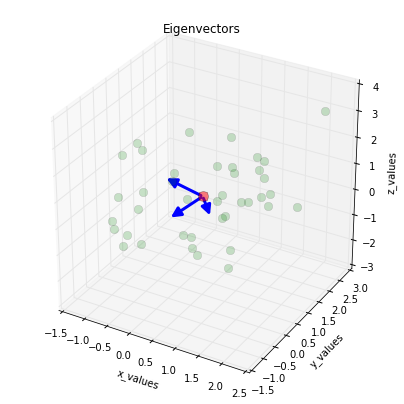

In [25]:
%matplotlib inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(all_samples[0,:], all_samples[1,:], all_samples[2,:],
        'o', markersize=8, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z],
        'o', markersize=10, color='red', alpha=0.5)
for v in eig_vec_sc.T:
    a = Arrow3D([mean_x, v[0]+mean_x],
                [mean_y, v[1]+mean_y],
                [mean_z, v[2]+mean_z],
                mutation_scale=20, lw=3, arrowstyle="-|>", color="b")

    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

In [ ]:
# step 5. sort eigenvector by decreasing value

In [20]:
for ev in eig_vec_sc:
    numpy.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
    # instead of 'assert' because of rounding errors

In [21]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:,i])
             for i in range(len(eig_val_sc))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])

65.1693677908
32.6947129632
26.5962032821


In [ ]:
# step 5.2 choose k eigenvectos w largest eigenvalues to form d x k matrix

In [22]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1),
                      eig_pairs[1][1].reshape(3,1)))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.49210223 -0.64670286]
 [-0.47927902 -0.35756937]
 [-0.72672348  0.67373552]]


In [ ]:
# step 6. use d x k to transform samples to new subspace

In [23]:
transformed = matrix_w.T.dot(all_samples)
assert transformed.shape == (2,40), "The matrix is not 2x40 dimensional."

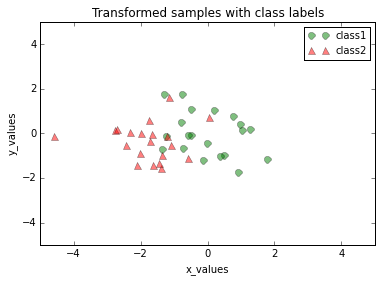

In [26]:
plt.plot(transformed[0,0:20], transformed[1,0:20],
         'o', markersize=7, color='green', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40],
         '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()

In [ ]:
# using matlibplot pca function

In [ ]:
#Class attributes of pca function
# a : a centered unit sigma version of input a
# numrows, numcols: the dimensions of a
# mu : a numdims array of means of a
# sigma : a numdims array of atandard deviation of a
# fracs : the proportion of variance of each of the principal components
# Wt : the weight vector for projecting a numdims point or array into PCA space
# Y : a projected into PCA space

# pca expects a numpy array

PC axes in terms of the measurement axes scaled by the standard deviations:
 [[-0.57087338 -0.58973911 -0.5712367 ]
 [-0.71046744  0.006114    0.70370352]
 [ 0.41150894 -0.80757068  0.42248075]]


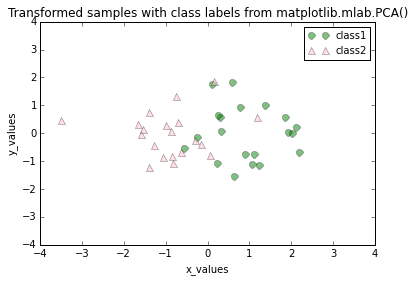

In [28]:
from matplotlib.mlab import PCA as mlabPCA

mlab_pca = mlabPCA(all_samples.T)

print('PC axes in terms of the measurement axes scaled by the standard deviations:\n', mlab_pca.Wt)

plt.plot(mlab_pca.Y[0:20,0],mlab_pca.Y[0:20,1],
         'o', markersize=7, color='green', alpha=0.5, label='class1')
plt.plot(mlab_pca.Y[20:40,0], mlab_pca.Y[20:40,1],
         '^', markersize=7, color='pink', alpha=0.5, label='class2')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()

In [ ]:
# use matlibplot pca on a dataset

In [29]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

data = load_iris()
X = data.data

# convert features in column 1 from cm to inches
X[:,0] /= 2.54
# convert features in column 2 from cm to meters
X[:,1] /= 100

In [31]:
X

array([[ 2.00787402,  0.035     ,  1.4       ,  0.2       ],
       [ 1.92913386,  0.03      ,  1.4       ,  0.2       ],
       [ 1.8503937 ,  0.032     ,  1.3       ,  0.2       ],
       [ 1.81102362,  0.031     ,  1.5       ,  0.2       ],
       [ 1.96850394,  0.036     ,  1.4       ,  0.2       ],
       [ 2.12598425,  0.039     ,  1.7       ,  0.4       ],
       [ 1.81102362,  0.034     ,  1.4       ,  0.3       ],
       [ 1.96850394,  0.034     ,  1.5       ,  0.2       ],
       [ 1.73228346,  0.029     ,  1.4       ,  0.2       ],
       [ 1.92913386,  0.031     ,  1.5       ,  0.1       ],
       [ 2.12598425,  0.037     ,  1.5       ,  0.2       ],
       [ 1.88976378,  0.034     ,  1.6       ,  0.2       ],
       [ 1.88976378,  0.03      ,  1.4       ,  0.1       ],
       [ 1.69291339,  0.03      ,  1.1       ,  0.1       ],
       [ 2.28346457,  0.04      ,  1.2       ,  0.2       ],
       [ 2.24409449,  0.044     ,  1.5       ,  0.4       ],
       [ 2.12598425,  0.

In [37]:
# pca based on covariance matrix of the raw data

In [38]:
def pca_raw_cov(X):
    # Compute the covariance matrix
    cov_mat = np.cov(X.T)

    # Eigendecomposition of the covariance matrix
    eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

    # Make a list of (eigenvalue, eigenvector) tuples
    # and sort the (eigenvalue, eigenvector) tuples from high to low
    eig_pairs_cov = [(np.abs(eig_val_cov[i]), eig_vec_cov[:,i]) for i in range(len(eig_val_cov))]
    eig_pairs_cov.sort()
    eig_pairs_cov.reverse()

    # Construct the transformation matrix W from the eigenvalues that correspond to
    # the k largest eigenvalues (here: k = 2)
    matrix_w_cov = np.hstack((eig_pairs_cov[0][1].reshape(4,1), eig_pairs_cov[1][1].reshape(4,1)))

    # Transform the data using matrix W
    X_raw_transf = matrix_w_cov.T.dot(X.T).T

    # Plot the data
    plt.scatter(X_raw_transf[:,0], X_raw_transf[:,1])
    plt.title('PCA based on the covariance matrix of the raw data')
    plt.show()

In [ ]:
# pca based on covariance matrix of the standardized data

In [39]:
def pca_standardize_cov(X):

    # Standardize data
    X_std = StandardScaler().fit_transform(X)

    # Compute the covariance matrix
    cov_mat = np.cov(X_std.T)

    # Eigendecomposition of the covariance matrix
    eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

    # Make a list of (eigenvalue, eigenvector) tuples
    # and sort the (eigenvalue, eigenvector) tuples from high to low
    eig_pairs_cov = [(np.abs(eig_val_cov[i]), eig_vec_cov[:,i]) for i in range(len(eig_val_cov))]
    eig_pairs_cov.sort()
    eig_pairs_cov.reverse()

    # Construct the transformation matrix W from the eigenvalues that correspond to
    # the k largest eigenvalues (here: k = 2)
    matrix_w_cov = np.hstack((eig_pairs_cov[0][1].reshape(4,1), eig_pairs_cov[1][1].reshape(4,1)))

    # Transform the data using matrix W
    X_std_transf = matrix_w_cov.T.dot(X_std.T).T

    # Plot the data
    plt.scatter(X_std_transf[:,0], X_std_transf[:,1])
    plt.title('PCA based on the covariance matrix after standardizing the data')
    plt.show()

In [ ]:
# pca based on correlation matrix of the raw data

In [40]:
def pca_cor(X):

    # Standardize data
    X_std = StandardScaler().fit_transform(X)

    # Compute the correlation matrix
    cor_mat = np.corrcoef(X.T)

    # Eigendecomposition of the correlation matrix
    eig_val_cor, eig_vec_cor = np.linalg.eig(cor_mat)

    # Make a list of (eigenvalue, eigenvector) tuples
    # and sort the (eigenvalue, eigenvector) tuples from high to low
    eig_pairs_cor = [(np.abs(eig_val_cor[i]), eig_vec_cor[:,i]) for i in range(len(eig_val_cor))]
    eig_pairs_cor.sort()
    eig_pairs_cor.reverse()

    # Construct the transformation matrix W from the eigenvalues that correspond to
    # the k largest eigenvalues (here: k = 2)
    matrix_w_cor = np.hstack((eig_pairs_cor[0][1].reshape(4,1), eig_pairs_cor[1][1].reshape(4,1)))

    # Transform the data using matrix W
    X_transf = matrix_w_cor.T.dot(X_std.T).T

    # Plot the data
    plt.scatter(X_transf[:,0], X_transf[:,1])
    plt.title('PCA based on the correlation matrix of the raw data')
    plt.show()

In [ ]:
# using scikit learn based on SVD

In [42]:
from sklearn.decomposition import PCA

def scikit_pca(X):

    # Standardize
    X_std = StandardScaler().fit_transform(X)

    # PCA
    sklearn_pca = PCA(n_components=2)
    X_transf = sklearn_pca.fit_transform(X_std)

    # Plot the data
    plt.scatter(X_transf[:,0], X_transf[:,1])
    plt.title('PCA via scikit-learn (using SVD)')
    plt.show()

In [ ]:
# visual comparision of all methods

//anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


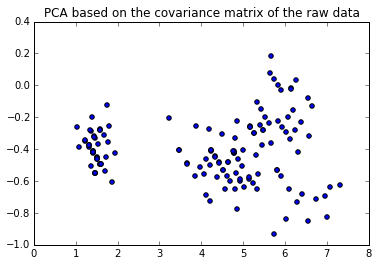

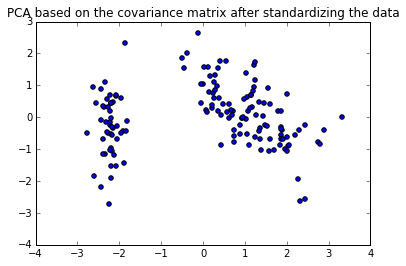

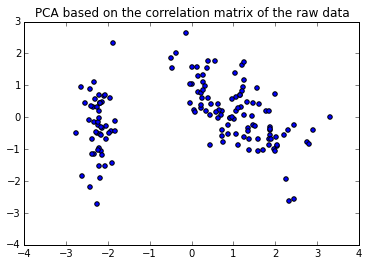

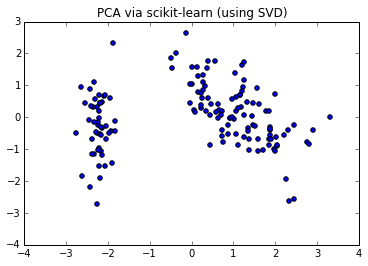

In [43]:
pca_raw_cov(X)
pca_standardize_cov(X)
pca_cor(X)
scikit_pca(X)

In [ ]:
# why does the correlation matrix require raw data?
# which correctly identifies the various flowers?
# in what cases is scaling important to sort classes w pca?